### 친구 역설

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#### 한글 폰트 불러오기

In [4]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)
plt.rcParams['axes.unicode_minus'] = False

#### 그래프 제작

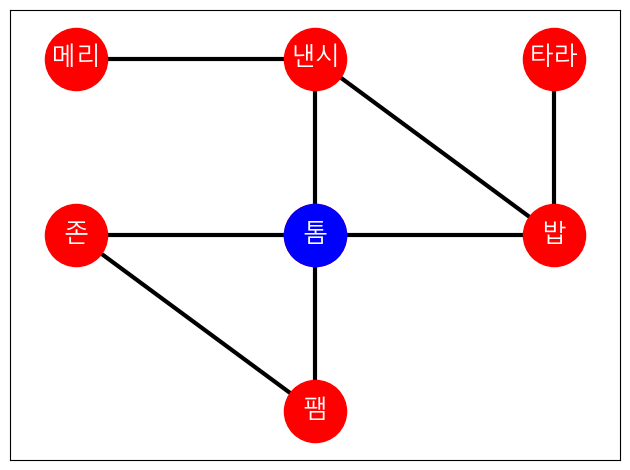

In [5]:
a = nx.Graph()

a.add_edges_from([('메리','낸시'),
                  ('낸시','톰'),('낸시','밥'),
                  ('톰','존'),('톰','팸'),('톰','밥'),
                  ('존','팸'),
                  ('밥','타라')])

fix = {"메리":[0,1],
       "낸시":[0.5,1],
       "톰":[0.5,0.5],
       "타라":[1,1],
       "존":[0,0.5],
       "팸":[0.5,0],
       "밥":[1,0.5]}

options = {"node_color":"blue", "node_size":2000}

nx.draw_networkx_nodes(a, pos = fix, node_size=2000, node_color = 'red')
nx.draw_networkx_nodes(a, pos = fix, nodelist=['톰'], **options)

nx.draw_networkx_labels(a, pos = fix, font_family = font, font_size=18, font_color = 'white')

nx.draw_networkx_edges(a, pos = fix, width = 3)


ax = plt.gca()
ax.margins(0.08)
plt.tight_layout()
plt.show()

In [21]:
import numpy as np

round(np.mean(list(nx.average_neighbor_degree(a).values())),2)

2.83

In [22]:
val = []

for i in range(len(list(nx.degree(a)))):
    val.append(list(nx.degree(a))[i][1])
round(np.mean(val),2)

2.29

### 문제 3.4

In [201]:
a_degree_max = np.max([a.degree(n) for n in a.nodes])

sample = dict(nx.degree(a))
ans = []

for key, value in sample.items():
    if value == a_degree_max :
         ans.append(key)
         
print(ans, a_degree_max)

['톰'] 4


In [41]:
highest_degree_node = max(a.nodes, key=a.degree)
highest_degree_node

'톰'

### 문제 3.6

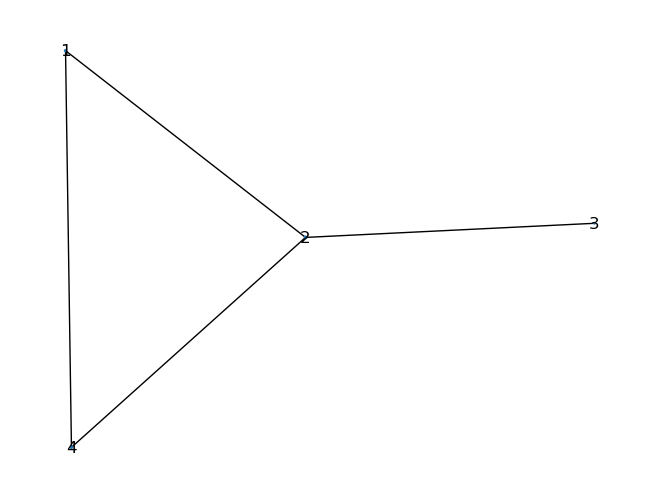

In [6]:
b = nx.Graph()

b.add_edges_from([(1,2),
                  (2,3),
                  (1,4),
                  (4,2)])
size = [b.degree(n) for n in b.nodes]

nx.draw(b, with_labels = True, node_size = size)

### 문제 3.11

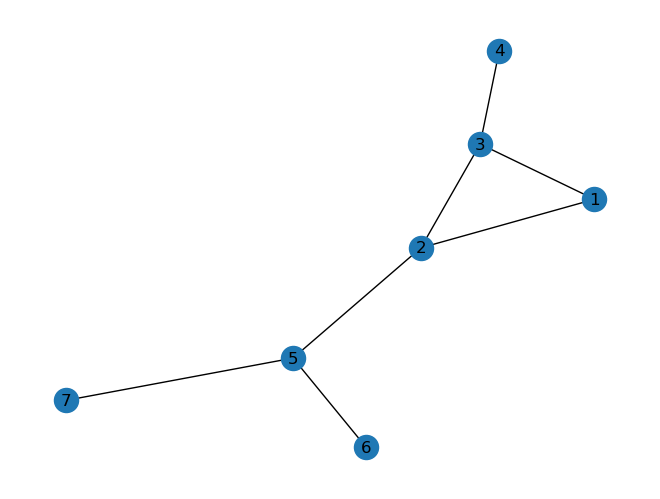

In [7]:
v = nx.Graph()

v.add_edges_from([(1,2),(1,3),
                  (2,3),(2,5),
                  (3,4),
                  (5,6),(5,7)])

nx.draw(v, with_labels = True)

In [12]:
v.degree()

DegreeView({1: 2, 2: 3, 3: 3, 5: 3, 4: 1, 6: 1, 7: 1})

In [7]:
v_degree_max = np.max([v.degree(n) for n in v.nodes])

sample = dict(nx.degree(v))
ans = []

for key, value in sample.items():
    if value == v_degree_max :
         ans.append(key)
         
print(ans, v_degree_max)

[2, 3, 5] 3


#### dict에서 max key, value를 찾는 함수 제작

In [21]:
from collections import defaultdict

def get_max_key(data):
    d = defaultdict(list)
    for key, value in data.items():
        d[value].append(key)
    return max(d.items())[1]

In [76]:
v_bc = nx.betweenness_centrality(v)
get_max_key(v_bc)

[2, 5]

In [27]:
v_cc = nx.closeness_centrality(v)
get_max_key(v_cc)

[2]

### 문제 3.17

#### 1번

In [1]:
import networkx as nx

air = nx.read_graphml('data/openflights_usa.graphml.gz')

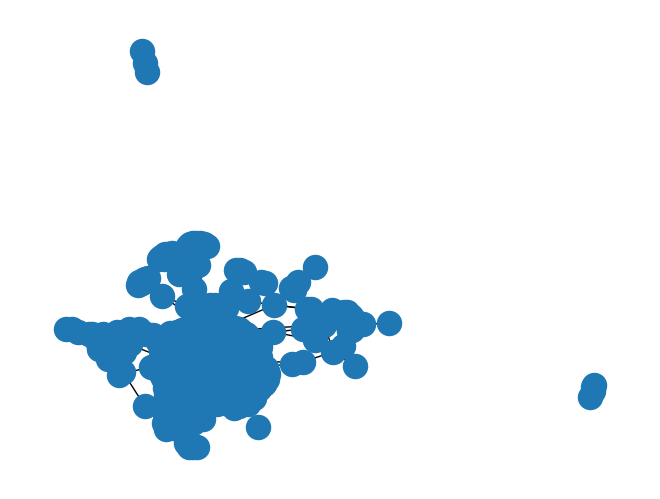

In [3]:
nx.draw(air) # node : 공항, link : 항공 노선

In [11]:
air_degree_mean = np.mean([air.degree(n) for n in air.nodes])
round(air_degree_mean,2)

10.19

#### 2번

In [2]:
air_rank = dict(air.degree())

import operator
sorted_air = sorted(air_rank.items(), key = operator.itemgetter(1), reverse=True)[:5] # 0은 key, 1은 value 기준으로 정렬
sorted_air

[('ATL', 153), ('ORD', 149), ('DEN', 148), ('DFW', 138), ('MSP', 117)]

#### 3번

In [64]:
def get_min_key(data):
    d = defaultdict(list)
    for key, value in data.items():
        d[value].append(key)
    return min(d.items())[1]

len(get_min_key(air_rank))

156

#### 4번

In [79]:
get_max_key(nx.closeness_centrality(air))

['DEN']

#### 5번

In [80]:
get_max_key(nx.betweenness_centrality(air))

['ANC']

#### 6번

In [99]:
air_node = air.number_of_nodes()
air_edge = air.number_of_edges()

In [102]:
k1 = nx.density(air)*(air_node-1) # 평균 연결선 수 = 조밀도 * (노드의 개수 - 1)


10.186813186813186

In [105]:
2*air_edge/air_node # => 2L/N도 동일한 결과 확인

10.186813186813186

In [109]:
val = []

for i in range(len(list(air.degree()))):
    val.append(list(air.degree())[i][1])
    
def sqr(list):
    return [i * i for i in list]

k2 = sum(sqr(val))/air_node # 평균 제곱 연결선 수
print(k2)

554.9157509157509


In [112]:
k = k2/(k1**2) # 불균일도 = 평균 제곱 연결선 수 / 평균 연결선 수의 제곱
round(k,2)

5.35

### 1장 오류 - 커널 충돌로 진행 불가

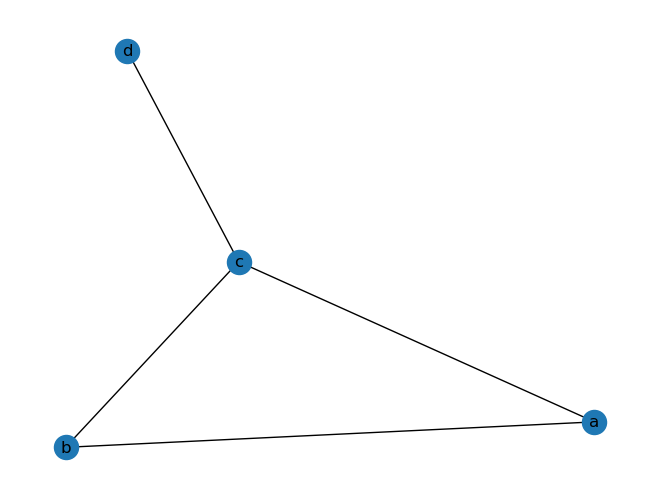

In [6]:
import networkx as nx

G = nx.Graph()
G.add_node('a')
nodes_to_add = ['b','c','d']
G.add_nodes_from(nodes_to_add)

G.add_edge('a','b')
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

nx.draw(G, with_labels = True)

In [1]:
items = ['spider','y','banana']
[item.upper() for item in items]

['SPIDER', 'Y', 'BANANA']

In [7]:
print(G.nodes())
print([G.degree(n) for n in G.nodes()])

['a', 'b', 'c', 'd']
[2, 2, 3, 1]


### 문제 3.18

#### 1번

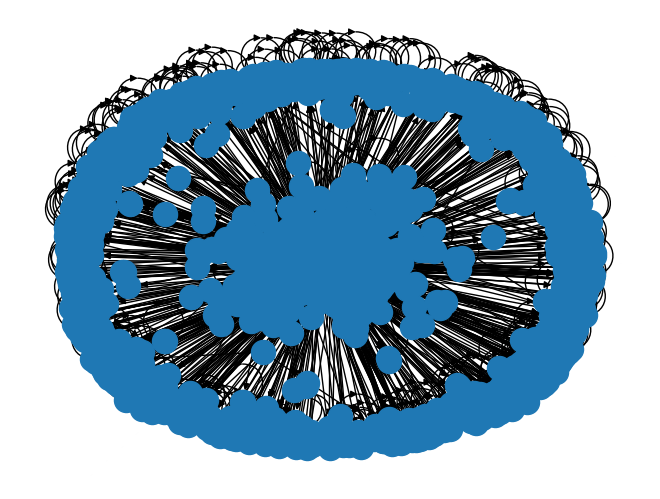

In [9]:
math = nx.read_graphml('data/enwiki_math.graphml.gz')
nx.draw(math)

In [29]:
nx.is_directed(math)

True

In [20]:
import numpy as np

math_in = [math.in_degree(n) for n in math.nodes()]
math_out = [math.out_degree(n) for n in math.nodes()]
print(round(np.mean(math_in),2), round(np.mean(math_out),2))

12.75 12.75


#### 2번

In [22]:
get_max_key(dict(math.in_degree()))

['1152126']

#### 3번

In [30]:
get_max_key(dict(math.out_degree()))

['47738065']

#### 4번

In [32]:
# dict형식에서 max value 찾는 함수

def get_max_value(data):
    d = defaultdict(list)
    for key, value in data.items():
        d[value].append(key)
    return max(d.items())[0]

In [33]:
get_max_value(dict(math.in_degree())) # 들어오는 최대 연결선 수

5171

In [34]:
get_max_value(dict(math.out_degree())) # 나가는 최대 연결선 수

1356

#### 5번

In [54]:
# 불균일도 = 평균 제곱 연결선 수 / 평균 연결선 수의 제곱

# 1. 들어오는 평균 연결선 수

math_in_avg = np.mean(math_in)

# 2. 들어오는 평균 제곱 연결선 수

def sqr(list):
    return [i * i for i in list]

math_in_sqrt = sum(sqr(math_in))/nx.number_of_nodes(math) 

# 3. 불균일도 계산

print(round(math_in_sqrt/(math_in_avg)**2,2))


38.21


#### 6번

In [55]:
math_out_avg = np.mean(math_out)
math_out_sqrt = sum(sqr(math_out))/nx.number_of_nodes(math)

print(round(math_out_sqrt/(math_out_avg)**2,2))

6.62


### 문제 3.19

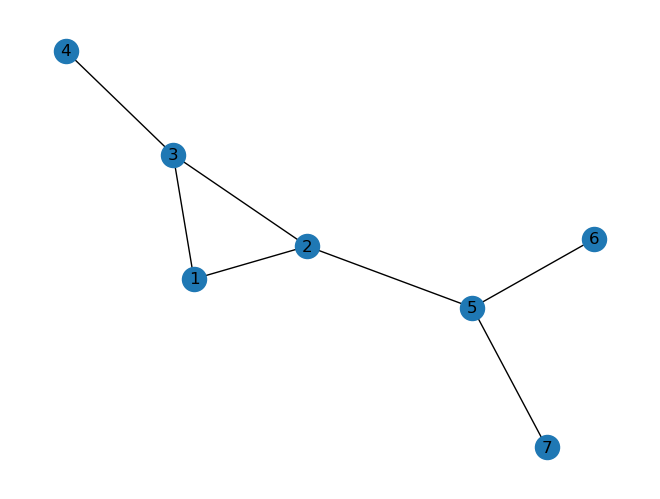

In [8]:
nx.draw(v, with_labels = True)    

In [16]:
# 개별 노드의 이웃 평균 연결선 수 반환 함수

def node_avg(graph, name):
    
    val =[]
    for i in range(len(list(graph.neighbors(name)))):
        val.append(graph.degree(list(graph.neighbors(name))[i]))
    return np.mean(val)

In [14]:
# 그래프 전체 이웃 평균 연결선 수 반환 함수

def node_all_avg(graph):

    ans = []

    for j in range(len(graph.nodes())):
        node = list(graph.nodes())
        ans.append(node_avg(graph, node[j]))
    return round(np.mean(ans),2)

In [10]:
# node_avg의 또 다른 방법

def avg_degree_neighbors(graph, friend):
    if graph.degree(friend) > 0:
        k = 0
        for node in graph.neighbors(friend):
            k += graph.degree(node)/graph.degree(friend)
        return k
    else :
        print(friend,'is undeifined')

In [18]:
print(node_avg(v,1), avg_degree_neighbors(v,1))

3.0 3.0


In [130]:
node_all_avg(v)

2.62

In [108]:
round(np.mean(list(nx.average_neighbor_degree(v).values())),2) # v 네트워크로 동일함 확인

2.62

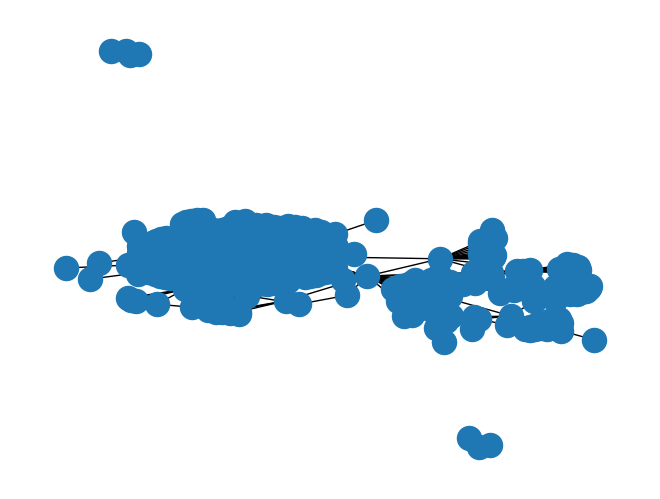

In [102]:
air = nx.read_graphml('data/openflights_usa.graphml.gz') # air 네트워크
nx.draw(air)

In [122]:
round(np.mean(list(nx.average_neighbor_degree(air).values())),2)

64.05

In [131]:
node_all_avg(air) # 노드 이웃의 평균 연결선 수

64.05

In [128]:
np.mean([air.degree(n) for n in air.nodes]) # air 네트워크 평균 연결선 수, 이웃의 평균 연결선 수가 더 크므로 친구 역설이 성립한다.

10.186813186813186

### 문제 3.20

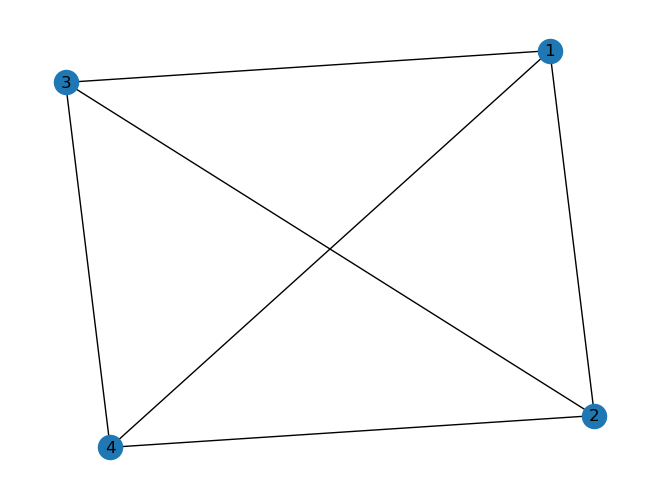

In [132]:
ne = nx.Graph()

ne.add_edges_from([(1,2),(1,3),(1,4),
                   (2,3),(2,4),
                   (3,4)])

nx.draw(ne, with_labels = True)

In [133]:
node_all_avg(ne)

3.0

In [134]:
np.mean([ne.degree(n) for n in ne.nodes()])

3.0

### 문제 3.24

1. 연결선 수가 100 이상인 노드의 비율은 얼마나 되는가?

In [2]:
import networkx as nx

face = nx.read_edgelist('data/socfb-Northwestern25.edges.gz')

In [3]:
node_count = [face.degree(n) for n in face.nodes()] # 각 노드의 연결선 수

def biggerthanHundred(x): # 100이상의 값을 반환하는 함수
    return x>=100

node_hundred = list(filter(biggerthanHundred, node_count))

round(len(node_hundred)/len(node_count),4)


0.3821

2. 이 네트워크의 노드가 가진 연결선 수의 최댓값은 얼마인가?

In [14]:
max(node_count)

2105

3. 이 네트워크의 익명 사용자들(노드)에게는 숫자로 된 임의의 이름이 부여되어 있다. 어느 노드의 연결선 수가 가장 많은가?

In [17]:
from collections import defaultdict

def get_max_key(data):
    d = defaultdict(list)
    for key, value in data.items():
        d[value].append(key)
    return max(d.items())[1]

get_max_key(dict(face.degree()))

['8262']

In [18]:
def get_max_value(data):
    d = defaultdict(list)
    for key, value in data.items():
        d[value].append(key)
    return max(d.items())[0]

get_max_value(dict(face.degree()))

2105

4. 연결선 수에 대한 제 95 백분위수(노드의 95%가 해당 연결선 수 이하를 갖도록 하는 값)는 무엇인가?

In [20]:
import numpy as np

np.percentile(node_count,95) # 95% 추출

244.0

5. 이 네트워크의 노드들이 가진 평균 연결선 수는 얼마인가? 가장 가까운 정수로 반올림해서 나타내라.

In [27]:
round(np.mean(node_count))

92

6. 다음중 이 네트워크의 연결선 수 분포를 가장 잘 설명하는 모양은 무엇인가?

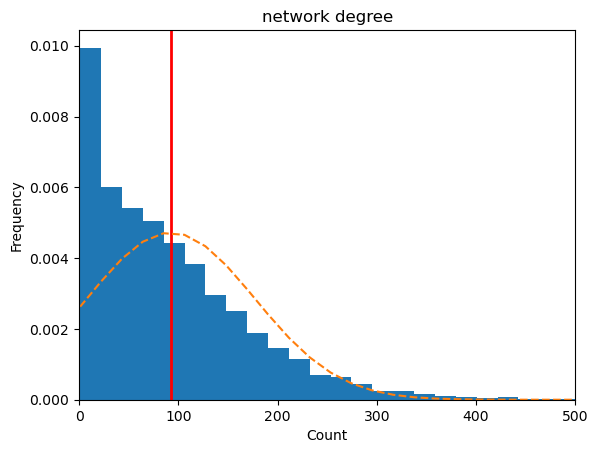

In [55]:
import matplotlib.pyplot as plt

avg = np.mean(node_count)
tan = np.std(node_count)

nbins = 100
n, bins, patches = plt.hist(node_count, bins = nbins, density=1)
plt.xlim(0,500)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('network degree')
plt.axvline(x = np.mean(node_count), linewidth =2, color = 'r')
y = ((1 / (np.sqrt(2 * np.pi) * tan)) * np.exp(-0.5 * (1/tan * (bins - avg))**2))
plt.plot(bins,y,'--')
plt.show()

<AxesSubplot:ylabel='Count'>

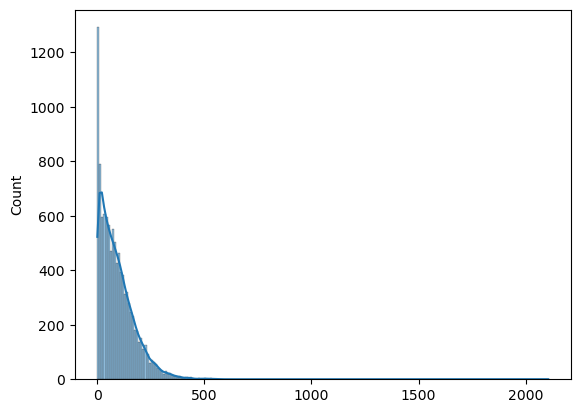

In [5]:
import seaborn as sns

sns.histplot(node_count, kde = True)